In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import holidays
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test= pd.read_csv("test.csv")
train= pd.read_csv("train.csv")

In [3]:
test.head(5)

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [66]:
train.head(5)

,id,date,country,store,product,num_sold,month,day,dayofweek,year,quarter,weekofyear,dayofyear,ismonthend,ismonthstart,isyearend,isyearstart
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,1,6,2017,1,52,1,False,True,False,True
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,1,6,2017,1,52,1,False,True,False,True
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,1,6,2017,1,52,1,False,True,False,True
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,1,6,2017,1,52,1,False,True,False,True
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,1,6,2017,1,52,1,False,True,False,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [7]:
combine=[train,test]

## country in dataset

In [8]:
train.country.value_counts()

Argentina    27390
Canada       27390
Estonia      27390
Japan        27390
Spain        27390
Name: country, dtype: int64

## different product in dataset

In [9]:
train["product"].value_counts()

Using LLMs to Improve Your Coding                 27390
Using LLMs to Train More LLMs                     27390
Using LLMs to Win Friends and Influence People    27390
Using LLMs to Win More Kaggle Competitions        27390
Using LLMs to Write Better                        27390
Name: product, dtype: int64

## EDA

In [22]:
for data in combine:
    data["date"]=pd.to_datetime(data.date)
    
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['dayofweek']=data['date'].dt.day_of_week
    data['year']=data['date'].dt.year
    
    data['quarter'] =data['date'].dt.quarter
    data['weekofyear']=data['date'].dt.isocalendar().week
    data['dayofyear']=data['date'].dt.day_of_year
    data['ismonthend']=data['date'].dt.is_month_end
    data['ismonthstart']=data['date'].dt.is_month_start
    data['isyearend']=data['date'].dt.is_year_end
    data['isyearstart']=data['date'].dt.is_year_start

In [68]:
a = train.groupby('year')['num_sold'].sum().reset_index()
a

,year,num_sold
0,2017,4451213
1,2018,4723963
2,2019,4522172
3,2020,4086498
4,2021,4884479


Text(0.5, 1.0, 'grap per year sold')

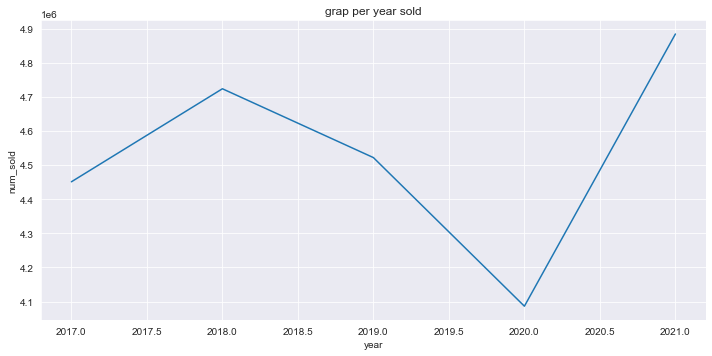

In [46]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.lineplot(data=a,x='year',y='num_sold',markers='<')
plt.tight_layout()
plt.title('grap sale per year ')

In [54]:
months= {1:'January',2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemember',12:'December'}
df = train.groupby('month')['num_sold'].sum().reset_index()
df['month']=df['month'].map(months)
df

,month,num_sold
0,January,2042783
1,Febuary,1782267
2,March,1905982
3,April,1764963
4,May,1866246
5,June,1779787
6,July,1858402
7,August,1867996
8,September,1833097
9,October,1924133


Text(0.5, 1.0, 'graph sale of per month')

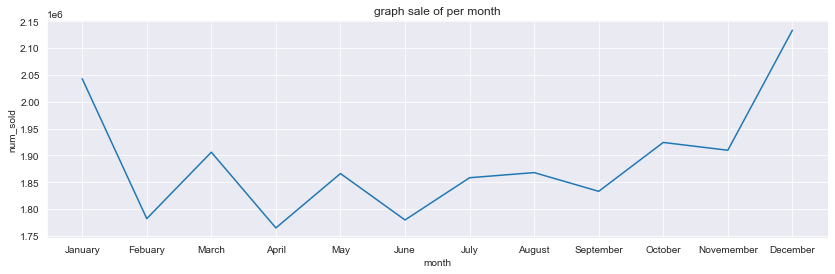

In [65]:
plt.figure(figsize=(14,4))
sns.lineplot(data=df,x='month',y="num_sold")
plt.title('graph sale of per month')

In [80]:
days ={1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
day = train.groupby('dayofweek')['numsold'].sum().reset_index()

KeyError: 'Column not found: numsold'

Text(0.5, 1.0, 'grap sale per weekday')

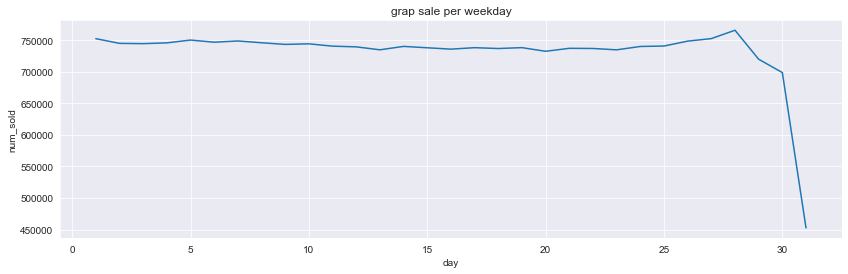

In [70]:
plt.figure(figsize=(14,4))
sns.lineplot(data=weekday,x='day',y='num_sold')
plt.title("grap sale per weekday")